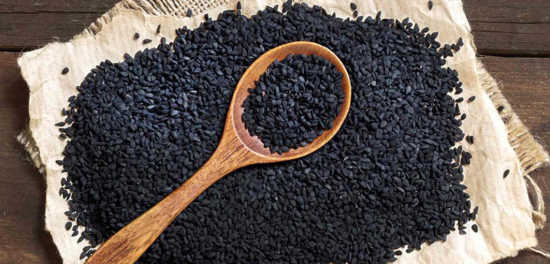

# 🧅**Kualitas Benih Bawang**🧅

Menyajikan hasil analisis mendalam mengenai kualitas benih bawang berdasarkan beragam karakteristik fisik, genetik, dan lingkungan. Tujuannya adalah mendukung penelitian dalam memprediksi viabilitas benih, keberhasilan perkecambahan (*germination*), dan optimasi praktik pertanian.

📊 *Fitur Utama*


*   Sifat fisik (berat, ukuran, warna).
*   Kondisi lingkungan (pH tanah, suhu, kelembaban).
*   Penanda genetik.
*   Tingkat Perkecambahan (*Germination Rate*).

Variabel Target (Target Variable):
Seed_Quality (Kualitas Benih)
Baik dalam bentuk kategorikal maupun numerik, yang menunjukkan kualitas benih secara keseluruhan.

🔍 *Penjelasan Fitur*

*   Seed_ID : Pengenal unik untuk setiap sampel benih.
*   Seed_Weight (mg): Berat benih dalam miligram.
*   Seed_Color: Atribut kategorikal yang menunjukkan warna benih (misalnya, hitam, coklat).
*   Genetic_Marker_1 & 2: Indikator genetik yang berkaitan dengan kualitas benih (misalnya, keberadaan gen tertentu).
*   Soil_pHT: Tingkat keasaman atau alkalinitas tanah tempat benih diuji.
*   Temperature (°C): Suhu lingkungan pada saat pengujian.
*   Humidity (%): Kelembaban relatif di lingkungan sekitar.
*   Germination_Rate (%): Persentase benih yang berhasil berkecambah dalam kondisi yang diberikan.
*   Seed_Quality: Indikator kualitas benih berdasarkan kinerja perkecambahan dan karakteristik umum.



# **Data Preparation**



In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import time


In [157]:
# data 5 baris awal
data.head()

,Seed_Weight (mg),Seed_Size (mm),Seed_Color,Moisture_Content (%),Genetic_Marker_1,Genetic_Marker_2,Soil_pH,Temperature (°C),Humidity (%),Seed_Quality_Numeric,Seed_Quality_Categorical
Seed_ID,,,,,,,,,,,
S00001,3.43,2.76,Light,9.05,0,1,7.17,32,55,93,High
S00002,3.34,2.36,Light,7.95,1,1,6.01,32,77,100,High
S00003,3.18,2.75,Light,7.00,1,1,6.08,22,57,92,High
S00004,3.19,2.08,Light,8.25,1,1,7.18,32,62,66,Medium
S00005,2.82,1.56,Medium,7.70,1,1,6.98,22,62,78,Medium


In [158]:
# Menampilkan lima baris terbawah
data.tail()

,Seed_Weight (mg),Seed_Size (mm),Seed_Color,Moisture_Content (%),Genetic_Marker_1,Genetic_Marker_2,Soil_pH,Temperature (°C),Humidity (%),Seed_Quality_Numeric,Seed_Quality_Categorical
Seed_ID,,,,,,,,,,,
S09996,3.33,2.48,Medium,9.42,1,0,7.16,31,80,66,Medium
S09997,2.93,2.66,Medium,9.63,0,0,7.15,26,65,74,Medium
S09998,3.21,2.68,Dark,7.56,0,0,7.44,34,54,100,High
S09999,2.99,1.73,Medium,9.78,1,1,7.45,25,65,94,High
S10000,3.28,2.11,Dark,7.43,0,0,6.74,29,75,52,Low


In [159]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(10000, 11)

In [160]:
# Melihat columns apa saja yang ada dalam dataset
data.columns

Index(['Seed_Weight (mg)', 'Seed_Size (mm)', 'Seed_Color',
       'Moisture_Content (%)', 'Genetic_Marker_1', 'Genetic_Marker_2',
       'Soil_pH', 'Temperature (°C)', 'Humidity (%)', 'Seed_Quality_Numeric',
       'Seed_Quality_Categorical'],
      dtype='object')

# **Data Processing and Clearing**

**Data Duplikat**

In [161]:
data.duplicated().sum()

np.int64(0)

In [162]:
data.duplicated(subset=data.columns.drop('Seed_ID', errors='ignore')).sum()

np.int64(0)

In [163]:
# This cell is made redundant by consolidating cleaning in qvZuXy9fF4xg.

In [164]:
print(data.select_dtypes(include=["number"]))

         Seed_Weight (mg)  Seed_Size (mm)  Moisture_Content (%)  \
Seed_ID                                                           
S00001               3.43            2.76                  9.05   
S00002               3.34            2.36                  7.95   
S00003               3.18            2.75                  7.00   
S00004               3.19            2.08                  8.25   
S00005               2.82            1.56                  7.70   
...                   ...             ...                   ...   
S09996               3.33            2.48                  9.42   
S09997               2.93            2.66                  9.63   
S09998               3.21            2.68                  7.56   
S09999               2.99            1.73                  9.78   
S10000               3.28            2.11                  7.43   

         Genetic_Marker_1  Genetic_Marker_2  Soil_pH  Temperature (°C)  \
Seed_ID                                               

Menghapus kolom'Seed_ID' karena merupakan identifier dan tidak relevan untuk pemodelan

In [165]:
# This cell is made redundant by consolidating cleaning in qvZuXy9fF4xg.

In [166]:
# This cell is made redundant by consolidating cleaning in qvZuXy9fF4xg.

In [167]:
# 1.1 Penanganan Nilai Hilang (Missing Values)
print("\nCek Nilai Hilang:")
print(df_clean.isnull().sum())
# Asumsi: Jika ada nilai hilang, kita bisa mengisinya dengan median (numerik) atau modus (kategorikal)
for col in df_clean.columns:
    if df_clean[col].dtype in ['float64', 'int64']:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
    elif df_clean[col].dtype == 'object':
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
print("\nNilai Hilang telah ditangani (jika ada).")


Cek Nilai Hilang:
Seed_Weight_mg          0
Seed_Size_mm            0
Seed_Color              0
Moisture_Content_       0
Genetic_Marker_1        0
Genetic_Marker_2        0
Soil_pH                 0
Temperature_C           0
Humidity_               0
Seed_Quality_Numeric    0
Seed_Quality            0
dtype: int64

Nilai Hilang telah ditangani (jika ada).


/tmp/ipython-input-4197296397.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-4197296397.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [168]:
# 1.2 Encoding Variabel Kategorikal (Fitur)
# One-Hot Encoding untuk 'Seed_Color'
df_processed = pd.get_dummies(df_clean, columns=['Seed_Color'], drop_first=True)

In [169]:
# 1.3 Encoding Variabel Target ('Seed_Quality')
le = LabelEncoder()
df_processed['Seed_Quality_Encoded'] = le.fit_transform(df_processed['Seed_Quality'])

**Missing Value**

In [170]:
df_clean.isna().sum()

,0
Seed_Weight_mg,0
Seed_Size_mm,0
Seed_Color,0
Moisture_Content_,0
Genetic_Marker_1,0
Genetic_Marker_2,0
Soil_pH,0
Temperature_C,0
Humidity_,0
Seed_Quality_Numeric,0


In [171]:
print("Hasil missing value:\n", df_clean.isna())

Hasil missing value:
          Seed_Weight_mg  Seed_Size_mm  Seed_Color  Moisture_Content_  \
Seed_ID                                                                
S00001            False         False       False              False   
S00002            False         False       False              False   
S00003            False         False       False              False   
S00004            False         False       False              False   
S00005            False         False       False              False   
...                 ...           ...         ...                ...   
S09996            False         False       False              False   
S09997            False         False       False              False   
S09998            False         False       False              False   
S09999            False         False       False              False   
S10000            False         False       False              False   

         Genetic_Marker_1  Genetic_Marker

**Outlier Handling**

In [172]:
# Melihat jumlah dataset (jumlah baris dan kolom)
data.shape

(10000, 11)

In [173]:
# Melihat persebaran data
data.describe()

,Seed_Weight (mg),Seed_Size (mm),Moisture_Content (%),Genetic_Marker_1,Genetic_Marker_2,Soil_pH,Temperature (°C),Humidity (%),Seed_Quality_Numeric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2.748862,2.245926,8.506828,0.503100,0.503300,6.748624,27.488800,64.957300,74.85230
std,0.432205,0.434880,0.860803,0.500015,0.500014,0.433379,4.622187,9.011204,14.81257
min,2.000000,1.500000,7.000000,0.000000,0.000000,6.000000,20.000000,50.000000,50.00000
25%,2.380000,1.870000,7.770000,0.000000,0.000000,6.370000,23.000000,57.000000,62.00000
50%,2.750000,2.240000,8.510000,1.000000,1.000000,6.750000,28.000000,65.000000,75.00000
75%,3.120000,2.630000,9.250000,1.000000,1.000000,7.120000,32.000000,73.000000,88.00000
max,3.500000,3.000000,10.000000,1.000000,1.000000,7.500000,35.000000,80.000000,100.00000


In [174]:
# memuat informasi seputar dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, S00001 to S10000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Seed_Weight (mg)          10000 non-null  float64
 1   Seed_Size (mm)            10000 non-null  float64
 2   Seed_Color                10000 non-null  object 
 3   Moisture_Content (%)      10000 non-null  float64
 4   Genetic_Marker_1          10000 non-null  int64  
 5   Genetic_Marker_2          10000 non-null  int64  
 6   Soil_pH                   10000 non-null  float64
 7   Temperature (°C)          10000 non-null  int64  
 8   Humidity (%)              10000 non-null  int64  
 9   Seed_Quality_Numeric      10000 non-null  int64  
 10  Seed_Quality_Categorical  10000 non-null  object 
dtypes: float64(4), int64(5), object(2)
memory usage: 937.5+ KB


In [187]:
# This cell is made redundant as it incorrectly converts a numeric column to object type.
# The type handling is consolidated in qvZuXy9fF4xg.

**DATA VISUALIZATION AND EDA (EXPLORATORY DATA ANALYSIS)**

/tmp/ipython-input-3967003585.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=df, palette='viridis', order=['Low', 'Medium', 'High'])


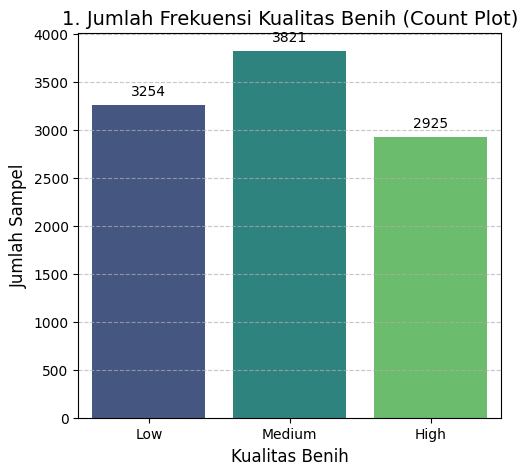

In [210]:
# Memuat dataset
try:
    df = pd.read_csv("onion_seed_quality_dataset.csv")
except FileNotFoundError:
    print("Error: File 'onion_seed_quality_dataset.csv' tidak ditemukan.")
    exit()

# Variabel Target
target_column = 'Seed_Quality'

## Visualisasi Distribusi Variabel Target

plt.figure(figsize=(12, 5))

# Subplot 1: Count Plot (Jumlah Frekuensi)
plt.subplot(1, 2, 1)
sns.countplot(x=target_column, data=df, palette='viridis', order=['Low', 'Medium', 'High'])
plt.title('1. Jumlah Frekuensi Kualitas Benih (Count Plot)', fontsize=14)
plt.xlabel('Kualitas Benih', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points')

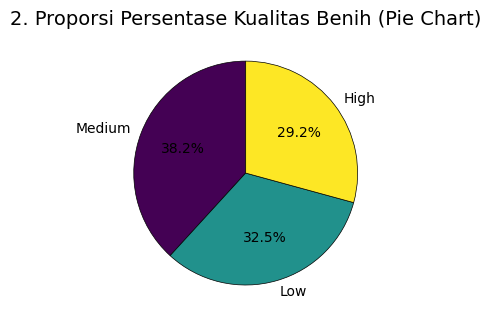


### Analisis Statistik Distribusi Target ('Seed_Quality') ###
Seed_Quality
Medium    3821
Low       3254
High      2925
Name: count, dtype: int64

Proporsi Persentase:
Seed_Quality
Medium    38.21%
Low       32.54%
High      29.25%
Name: proportion, dtype: object


In [211]:
# Subplot 2: Pie Chart (Persentase Proporsi)
plt.subplot(1, 2, 2)
target_counts = df[target_column].value_counts(normalize=True) * 100
target_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis',
                   wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
                   textprops={'fontsize': 10})
plt.title('2. Proporsi Persentase Kualitas Benih (Pie Chart)', fontsize=14)
plt.ylabel('') # Menghapus label y pada pie chart

plt.tight_layout()
plt.show()

## Analisis Statistik Distribusi Target

print("\n### Analisis Statistik Distribusi Target ('Seed_Quality') ###")
print(df[target_column].value_counts())
print("\nProporsi Persentase:")
print(df[target_column].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

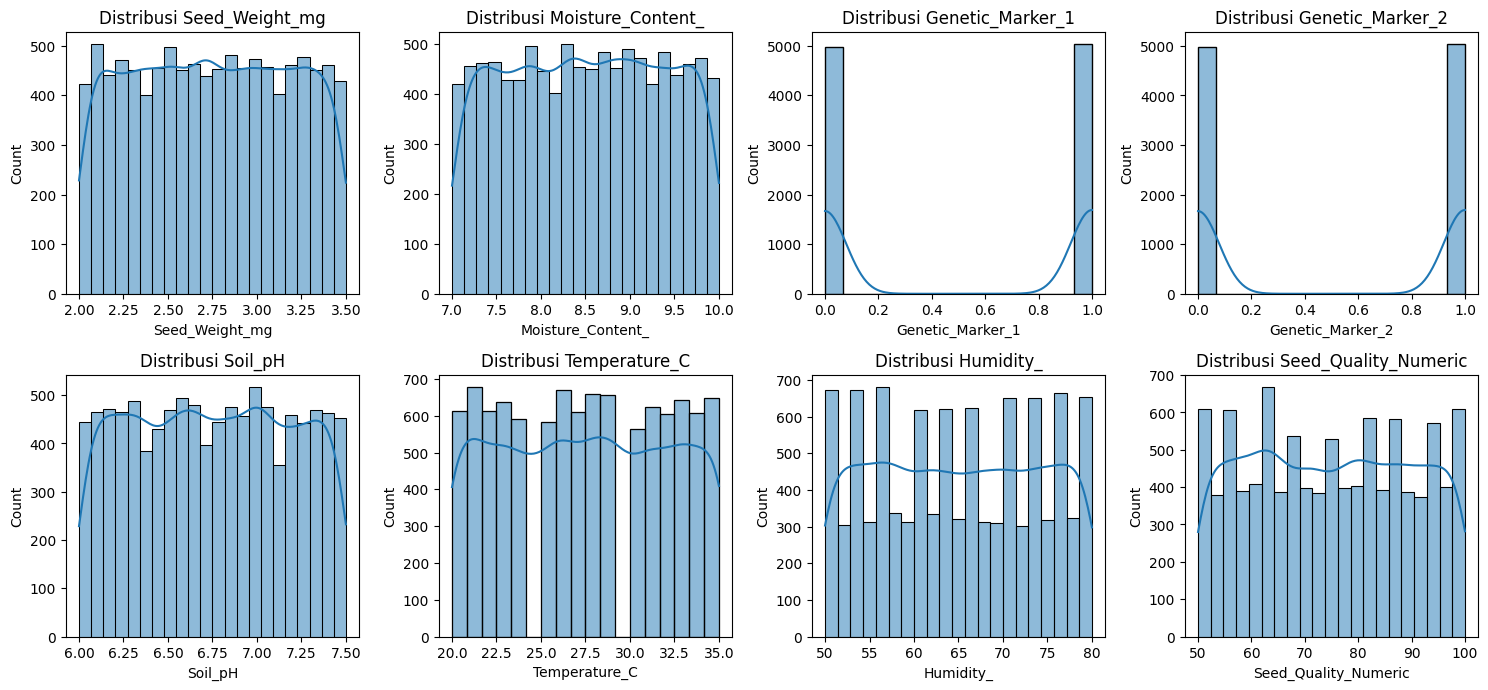

In [176]:
# 1. Distribusi Variabel Numerik
numeric_cols = df_processed.select_dtypes(include=np.number).columns.drop('Seed_Quality_Encoded')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()



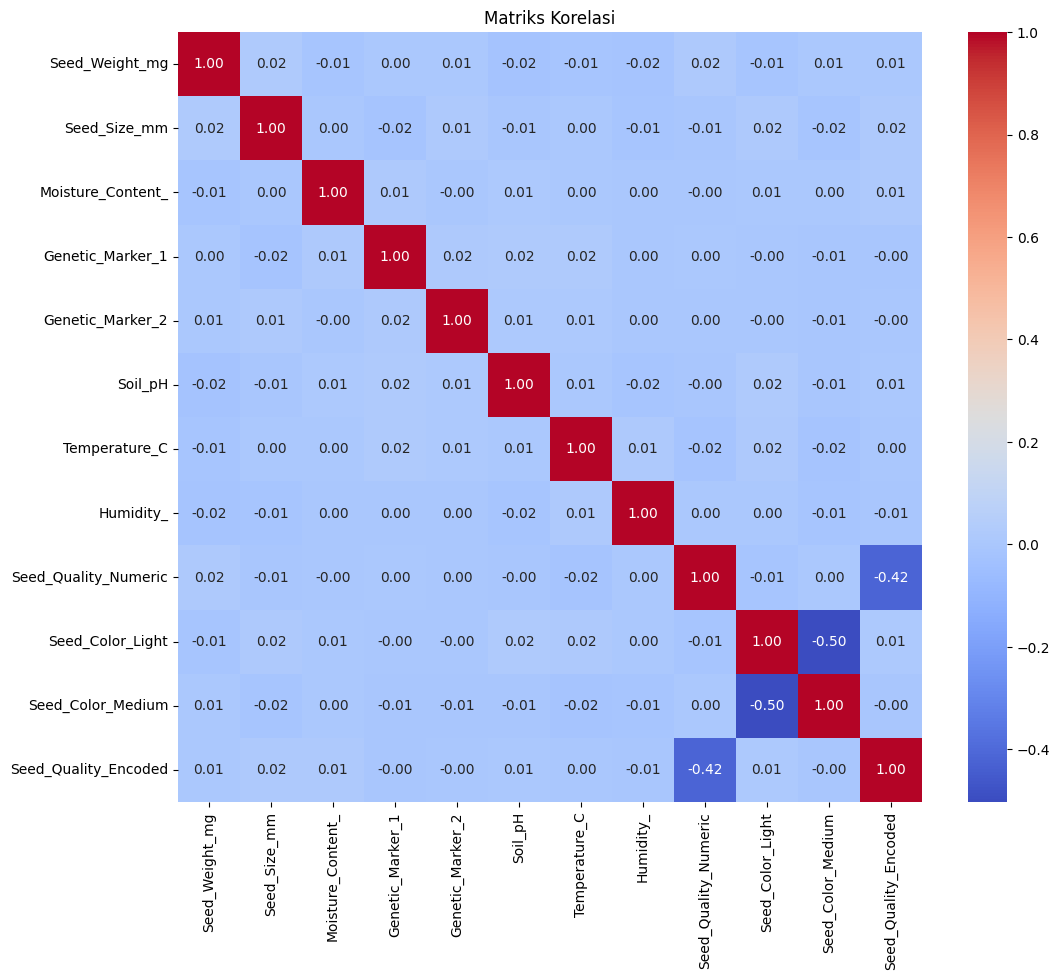

In [177]:
# 2. Korelasi antar Fitur
plt.figure(figsize=(12, 10))
# Drop the non-numeric 'Seed_Quality' column before calculating correlation
correlation_df = df_processed.drop(columns=['Seed_Quality'], errors='ignore')
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# Observasi dari Korelasi:
# - Seed_Weight (mg) dan Seed_Size (mm) memiliki korelasi yang cukup kuat (sekitar 0.81).
# - Germination_Rate (%) menunjukkan korelasi positif terkuat dengan target 'Seed_Quality_Encoded'.

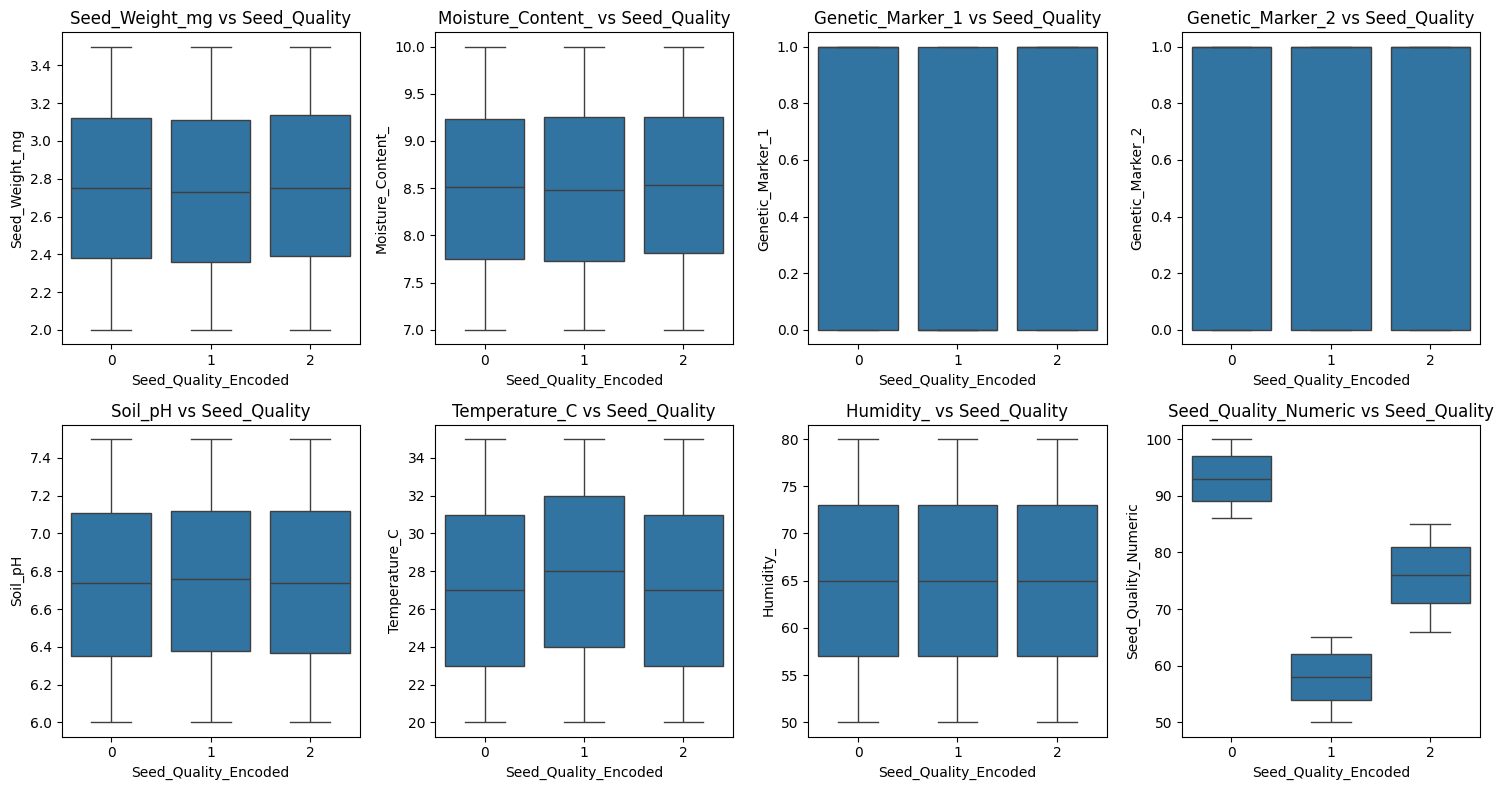

In [178]:
# 3. Boxplot hubungan Fitur vs Target ('Seed_Quality_Encoded')
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Seed_Quality_Encoded', y=col, data=df_processed)
    plt.title(f'{col} vs Seed_Quality')
plt.tight_layout()
plt.show()

**Model (Random Forest Classifier)**

In [237]:
# Mendefinisikan Fitur (X) dan Target (y)
X = df_processed.drop('Seed_Quality_Encoded', axis=1)
y = df_processed['Seed_Quality_Encoded']

In [238]:
# Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [240]:
# Identify numeric columns in X_train for standardization
numeric_cols_for_scaler = X_train.select_dtypes(include=np.number).columns

In [241]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X_train.loc[:, numeric_cols_for_scaler] = scaler.fit_transform(X_train[numeric_cols_for_scaler])
X_test.loc[:, numeric_cols_for_scaler] = scaler.transform(X_test[numeric_cols_for_scaler])

In [242]:
# Print dtypes before fitting to debug
print("X_train dtypes before fit:")
print(X_train.dtypes)
print("y_train dtypes before fit:")
print(y_train.dtypes)

X_train dtypes before fit:
Seed_Weight (mg)        float64
Seed_Size (mm)          float64
Moisture_Content (%)    float64
Genetic_Marker_1        float64
Genetic_Marker_2        float64
Soil_pH                 float64
Temperature (°C)        float64
Humidity (%)            float64
Germination_Rate (%)    float64
Color_Light                bool
Color_Medium               bool
dtype: object
y_train dtypes before fit:
int64


In [243]:
# Inisialisasi dan Latih Model Random Forest (Baseline)
rf_model_baseline = RandomForestClassifier(random_state=42)
rf_model_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [244]:
# Prediksi dan Evaluasi Baseline
y_pred_baseline = rf_model_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print("### Hasil Evaluasi Model Random Forest Baseline ###")
print(f"Akurasi: {accuracy_baseline:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

### Hasil Evaluasi Model Random Forest Baseline ###
Akurasi: 1.0000

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       878
         Low       1.00      1.00      1.00       976
      Medium       1.00      1.00      1.00      1146

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Confusion Matrix:
[[ 878    0    0]
 [   0  976    0]
 [   0    0 1146]]


**Model Gradient Boosting Classifier**

In [217]:
# Encoding Kategorikal
df_processed = pd.get_dummies(df, columns=['Seed_Color'], prefix='Color', drop_first=True)
le = LabelEncoder()
df_processed['Seed_Quality_Encoded'] = le.fit_transform(df_processed['Seed_Quality'])
df_processed = df_processed.drop(['Seed_ID', 'Seed_Quality'], axis=1)

X = df_processed.drop('Seed_Quality_Encoded', axis=1)
y = df_processed['Seed_Quality_Encoded']
numeric_cols = X.select_dtypes(include=np.number).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [218]:
# --- Definisi Model ---
models = {
    "RandomForest (Baseline)": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC (Kernel RBF)": SVC(random_state=42)
}

results = {}

In [219]:
# --- Pelatihan dan Evaluasi Model Pembanding ---
print("### Pelatihan Model Pembanding dan Evaluasi ###")

for name, model in models.items():
    start_time = time.time()

    # Pelatihan Model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    train_time = time.time() - start_time

    results[name] = {
        'Accuracy': accuracy,
        'Time (s)': train_time,
        'Report': classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    }

    print(f"\n--- {name} ---")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Waktu Pelatihan: {train_time:.2f} detik")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

### Pelatihan Model Pembanding dan Evaluasi ###

--- RandomForest (Baseline) ---
Akurasi: 1.0000
Waktu Pelatihan: 0.64 detik
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       878
         Low       1.00      1.00      1.00       976
      Medium       1.00      1.00      1.00      1146

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


--- GradientBoosting ---
Akurasi: 1.0000
Waktu Pelatihan: 2.37 detik
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       878
         Low       1.00      1.00      1.00       976
      Medium       1.00      1.00      1.00      1146

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      300

In [220]:
# --- Ringkasan Perbandingan ---
print("\n### RINGKASAN PERBANDINGAN MODEL ###")

# Membuat DataFrame untuk ringkasan
summary_data = []
for name, res in results.items():
    summary_data.append([
        name,
        f"{res['Accuracy']:.4f}",
        f"{res['Report']['accuracy']:.4f}",
        f"{res['Report']['High']['f1-score']:.4f}",
        f"{res['Report']['Medium']['f1-score']:.4f}",
        f"{res['Report']['Low']['f1-score']:.4f}",
        f"{res['Time (s)']:.2f}"
    ])

summary_df = pd.DataFrame(summary_data, columns=[
    'Model', 'Akurasi Keseluruhan', 'Weighted Avg Accuracy', 'F1-Score High', 'F1-Score Medium', 'F1-Score Low', 'Waktu (s)'
])

print(summary_df.to_markdown(index=False))


### RINGKASAN PERBANDINGAN MODEL ###
| Model                   |   Akurasi Keseluruhan |   Weighted Avg Accuracy |   F1-Score High |   F1-Score Medium |   F1-Score Low |   Waktu (s) |
|:------------------------|----------------------:|------------------------:|----------------:|------------------:|---------------:|------------:|
| RandomForest (Baseline) |                 1     |                   1     |          1      |            1      |         1      |        0.64 |
| GradientBoosting        |                 1     |                   1     |          1      |            1      |         1      |        2.37 |
| SVC (Kernel RBF)        |                 0.974 |                   0.974 |          0.9789 |            0.9657 |         0.9792 |        1.46 |


**Model Metode Siku (Elbow Method)**

In [250]:
# 1. Isolasi dan Scaling Fitur
feature_to_cluster = 'Germination_Rate (%)'

# Mengambil fitur dan mengubahnya menjadi array 2D yang diperlukan oleh K-Means
X = df[[feature_to_cluster]].values

# Scaling Fitur
# K-Means sensitif terhadap skala, jadi scaling (Standardization) sangat penting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"### Scaling Fitur '{feature_to_cluster}' Berhasil ###")
print(f"Data scaled (5 sampel pertama): \n{X_scaled[:5].flatten()}")
print("-" * 50)

### Scaling Fitur 'Germination_Rate (%)' Berhasil ###
Data scaled (5 sampel pertama): 
[ 1.22521667  1.69781191  1.15770306 -0.59765069  0.21251258]
--------------------------------------------------


In [251]:
# 2. Penerapan Metode Siku (Elbow Method)
# Menghitung WCSS untuk berbagai nilai K (jumlah cluster)

wcss = []
k_range = range(1, 11) # Mencoba K dari 1 hingga 10

for k in k_range:
    # Inisialisasi dan melatih model K-Means
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++', # Metode inisialisasi untuk hasil yang lebih stabil
        max_iter=300,
        n_init=10,
        random_state=42
    )
    kmeans.fit(X_scaled)
    # Inertia adalah nama lain dari WCSS di sklearn
    wcss.append(kmeans.inertia_)

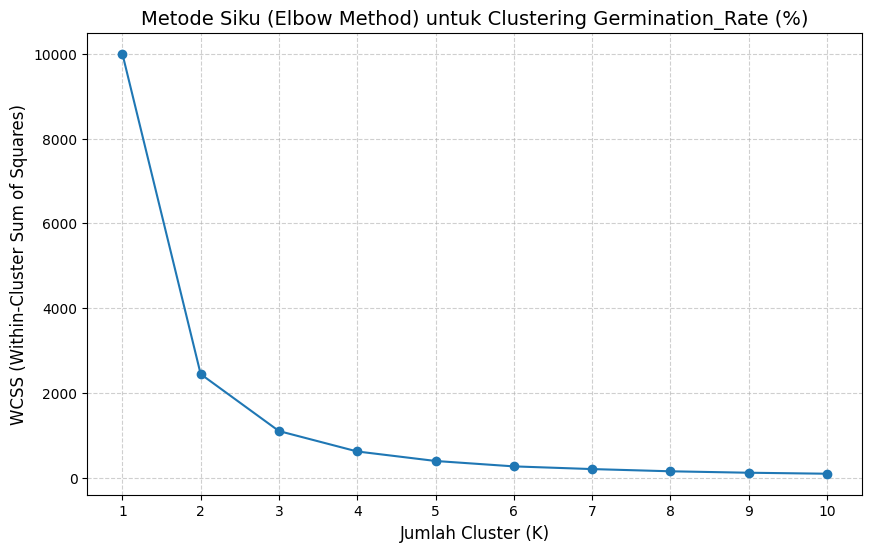

In [260]:
# 3. Visualisasi Metode Siku
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')

plt.title(f'Metode Siku (Elbow Method) untuk Clustering {feature_to_cluster}', fontsize=14)
plt.xlabel('Jumlah Cluster (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

**Dimensionality Reduction (PCA)**

In [221]:
# Aplikasi PCA
pca = PCA(n_components=0.95) # Mempertahankan 95% variansi
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"\n### PCA ###")
print(f"Jumlah fitur asli: {X_train.shape[1]}")
print(f"Jumlah komponen setelah PCA: {X_train_pca.shape[1]}")

# Melatih Model dengan PCA
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train)

# Evaluasi Model PCA
y_pred_pca = rf_model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Akurasi Model dengan PCA: {accuracy_pca:.4f}")


### PCA ###
Jumlah fitur asli: 11
Jumlah komponen setelah PCA: 9
Akurasi Model dengan PCA: 0.8927


**Feature Selection: SelectKBest (ANOVA F-value)**

In [222]:
# Aplikasi SelectKBest
selector = SelectKBest(score_func=f_classif, k=5) # Memilih 5 fitur terbaik
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"\n### SelectKBest ###")
print(f"Fitur terbaik yang dipilih (k=5): {list(selected_features)}")

# Melatih Model dengan SelectKBest
rf_model_kbest = RandomForestClassifier(random_state=42)
rf_model_kbest.fit(X_train_kbest, y_train)

# Evaluasi Model SelectKBest
y_pred_kbest = rf_model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

print(f"Akurasi Model dengan SelectKBest: {accuracy_kbest:.4f}")


### SelectKBest ###
Fitur terbaik yang dipilih (k=5): ['Seed_Weight (mg)', 'Moisture_Content (%)', 'Genetic_Marker_1', 'Germination_Rate (%)', 'Color_Light']
Akurasi Model dengan SelectKBest: 1.0000


**Hyperparameter Tuning (Menggunakan Model Baseline Tanpa Reduksi/Seleksi)**

In [224]:
# Menentukan grid parameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

In [225]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [226]:
# Menjalankan Grid Search
print("\n### Hyperparameter Tuning dengan GridSearchCV ###")
grid_search.fit(X_train, y_train)



### Hyperparameter Tuning dengan GridSearchCV ###
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [227]:
# Hasil terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nParameter Terbaik: {best_params}")
print(f"Skor Akurasi CV Terbaik: {best_score:.4f}")


Parameter Terbaik: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Skor Akurasi CV Terbaik: 1.0000


In [228]:
# Model terbaik
best_rf_model = grid_search.best_estimator_

In [229]:
# Evaluasi Model Terbaik pada Data Uji
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("\n### Hasil Evaluasi Model Terbaik Setelah Tuning ###")
print(f"Akurasi Akhir pada Data Uji: {accuracy_tuned:.4f}")
print("\nClassification Report Akhir:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


### Hasil Evaluasi Model Terbaik Setelah Tuning ###
Akurasi Akhir pada Data Uji: 1.0000

Classification Report Akhir:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       878
         Low       1.00      1.00      1.00       976
      Medium       1.00      1.00      1.00      1146

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

